In [248]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Model

### Class Structure:

 The code defines a class called Linear_regression to encapsulate the implementation of a linear regression model using gradient descent for optimization. 

### Initialization:

- x: Input feature matrix of shape (m, n), where m is the number of samples and n is the number of features.<br>
- y: Target values array of shape (m,).<br>
- m: Number of samples in the dataset.<br>
- n: Number of features in the dataset.<br>
- b: Initial bias set to 0.<br>
- w: Initial weight vector of shape (n,) with zero values.<br>
- alpha: Learning rate set to 0.045

### Cost Calculation:

__cost__: Calculates the mean squared error (cost) between predicted and actual target values.<br>
- Loops through each data point, computes the squared difference between the predicted value (using current weights and bias) and the actual value, and accumulates these squared differences.<br>
- Divides the accumulated squared differences by 2 times the number of samples to get the mean squared error.

### Gradient Calculation:

__gradient__: Computes the gradients of the cost function with respect to weights and bias.<br>
- Initializes arrays dj_dw and dj_db to store gradients for weights and bias respectively.<br>
- Iterates through each data point:<br>
- Computes the error between the predicted value and actual value.<br>
- For each feature, updates dj_dw with the product of the error and the corresponding feature value.<br>
- Updates dj_db with the error.<br>
- Divides the accumulated gradients by the number of samples to get average gradients.

### Gradient Descent Optimization:

__gradient_descent__: Performs gradient descent optimization to update model parameters.
- Iterates through a fixed number of iterations (100000 in this case) or until a small change in cost is detected.<br><br>
In each iteration:
- Computes gradients using __gradient__ method.
- Updates weights for each feature using the calculated gradients scaled by the learning rate.
- Updates the bias using the calculated bias gradient scaled by the learning rate.
- Checks if the iteration count is a multiple of 1000. If so, prints the iteration number and current cost.
- Keeps track of the cost history in j_history list.
- Checks if the cost change between the last two iterations is small (convergence condition). If so, returns cost history, updated weights, and bias.

### Prediction:

__predict__: Generates predictions using the learned weights and bias.
- Loops through each input data point:
- Calculates the predicted value by taking the dot product of weights and input features, and adding the bias.
- Appends the predicted value to the prediction list.

### R-2 Score

__r2_score__:Calculates the R-squared score, a measure of model performance.
- Compares predicted values (y_pred) to actual values (y_true).
- Measures how well the model explains variability in the actual data.
- A higher R-squared score indicates a better fit of the model to the data.
- Ranges from 0 (poor fit) to 1 (perfect fit).


### Testing

__test__: Evaluates the model on new, unseen data.
- Generates predictions (x_test) using the trained model.
- Compares predicted values to actual target values (y_test).
- Assesses how well the model generalizes to new data.
- Uses the R-squared score to quantify the model's predictive accuracy.
- Helps determine if the model's performance on training data extends to new instances.

In [249]:
import numpy as np

class Linear_regression:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.m, self.n = x.shape
        self.b = 0
        self.w = np.zeros(self.n)
        self.alpha = 0.045
        
    def __cost__(self):
        cost = 0.00
        for i in range(self.m):
            cost += (np.dot(self.x[i],self.w)+self.b-self.y[i])**2
        cost/= 2*self.m
        return cost
    
    def __gradient__(self):
        dj_dw = np.zeros((self.n,))
        dj_db = 0.0
        
        for i in range(self.m):
            err = (np.dot(self.x[i],self.w) + self.b)-self.y[i]
            for j in range(self.n):
                dj_dw[j] += (err*self.x[i,j])
            dj_db += err
        dj_dw /= self.m
        dj_db /= self.m
        return dj_dw, dj_db
    
    def gradient_descent(self):
        j_history= []
        
        for i in range(100000):
            dj_dw,dj_db = self.__gradient__()
            for j in range(self.n):
                self.w[j] -= (dj_dw[j]*self.alpha)
            self.b -= (dj_db*self.alpha)
            if(i%1000==1):
                print(f"Iteration: {i}     Cost: {self.__cost__()}")
                j_history.append(self.__cost__())
                if len(j_history)>1 :
                    if j_history[-2] - j_history[-1] < 0.005 :
                        return j_history,self.w,self.b      
        return j_history,self.w,self.b
    
    def predict(self,x_test):
        prediction = []
        for i in x_test:
            prediction.append(np.dot(self.w , i)+self.b)     
        return prediction

    def test(self, x_test, y_test):
        predictions = self.predict(x_test)
        r2 = self.__r2_score__(y_test, predictions)
        return r2
    
    def __r2_score__(self, y_true, y_pred):
        total_sum_of_squares = np.sum((y_true - np.mean(y_true))**2)
        residual_sum_of_squares = np.sum((y_true - y_pred)**2)
        r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
        return r2

In [250]:
import pandas as pd
import seaborn as sbn

# Getting an overview of the data

In [251]:
data = pd.read_csv("Life Expectancy Data.csv")
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [252]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## A visual representation of the missing entries in the data using heatmap

<AxesSubplot:>

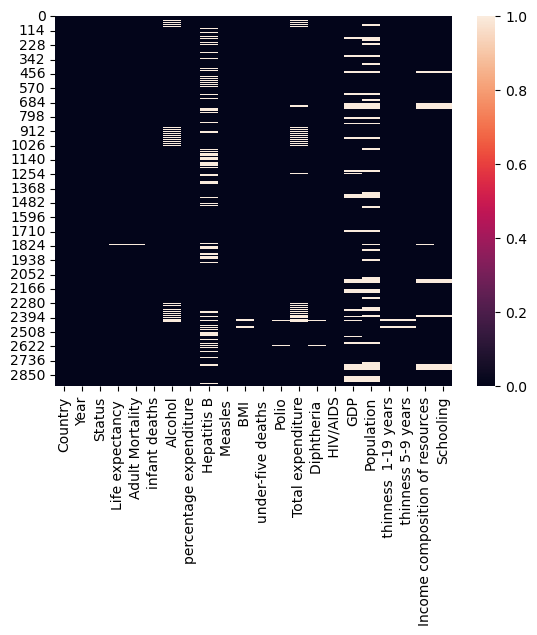

In [253]:
sbn.heatmap(data.isnull())

## Dropping the Features with very sparse data entries

In [254]:
### In this case 

In [255]:
data.drop(['Hepatitis B','GDP','Population'],axis = 1, inplace = True)
data = data.dropna(subset=['Life expectancy '])
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


<AxesSubplot:>

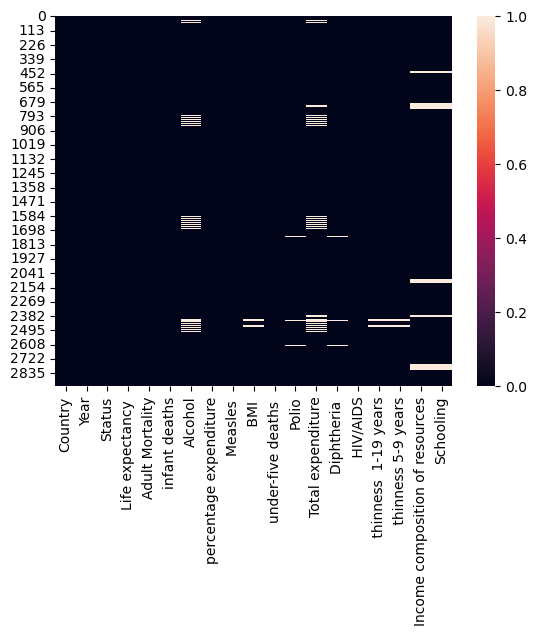

In [256]:
sbn.heatmap(data.isnull())

## Remaining NaN Values (Missing Entries)

In [257]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

## Splitting the Data into testing and training sets

Using train_test_split from the sklearn.model_selection module to split the dataset into training and testing sets for features (x_train and x_test) and corresponding target values (y_train and y_test), with a specified test size and random state.

In [258]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Life expectancy '],axis =1),data['Life expectancy '],test_size= 0.3, random_state = 6)

In [259]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

## Importing various preprocessing tools from the sklearn library:

In [260]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

### Initializing a ColumnTransformer named transformer for feature transformation.
Applies specific transformations to different columns in the dataset:
- 'trf1': Utilizes SimpleImputer to fill missing values in selected numeric health and resource columns.
- 'trf2': Uses OrdinalEncoder to convert categorical values in the 'Status' column ('Developing' or 'Developed') to numeric values.
- 'trf3': Employs OneHotEncoder to create binary columns for unique values in the 'Country' column.
- Preserves other columns unchanged using remainder='passthrough'.<br>

In [261]:
transformer = ColumnTransformer(transformers=[
    ('trf1', SimpleImputer(), [ 'Alcohol', 'Polio', 'Total expenditure', 'Diphtheria ', ' BMI ', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']),
    ('trf2', OrdinalEncoder(categories=[['Developing','Developed']]), ['Status']),
    ('trf3', OneHotEncoder(sparse=False, drop='first'), ['Country'])
], remainder='passthrough')

### Applying the transformer on different sets created

In [262]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.fit_transform(x_test)

### Changes in the shapes can be noticed after the transformer is applied

OneHotEncoder converts categorical data into binary columns, useful for handling categorical variables in machine learning models.

In [263]:
x_train.shape

(2049, 199)

### Normalization of data

The StandardScaler from sklearn.preprocessing is utilized to standardize the features in the training and testing datasets.<br>
A StandardScaler instance named scaler is created to manage the scaling process.

In [264]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Training the Model

Finally after the data is ready to be fed into the model.
- Initialize an instance of the Linear_regression class with testing data as inputs(x_test, y_test)
- Perform gradient descent on the testing data using the instance's gradient_descent method:
- cost_data, w, and b capture the cost history and updated model parameters.

In [265]:
l1 = Linear_regression(x_train,y_train)
cost_data, w,b = l1.gradient_descent()

Iteration: 1     Cost: 2024.9100547909075
Iteration: 1001     Cost: 1.7890937557649285
Iteration: 2001     Cost: 1.7510371428195524
Iteration: 3001     Cost: 1.7247647518783977
Iteration: 4001     Cost: 1.7055360517002662
Iteration: 5001     Cost: 1.6913786225044178
Iteration: 6001     Cost: 1.6808928612070422
Iteration: 7001     Cost: 1.6730678404560564
Iteration: 8001     Cost: 1.6671729179419332
Iteration: 9001     Cost: 1.6626799533581693


### Calculate the accuracy of the model using r2 score

In [267]:
r2_score = l1.test(x_test, y_test)

In [270]:
print(f"Overall R2 Score for the model is: {r2_score}")

Overall R2 Score for the model is: 0.8701991437810854


### Accuracy: 87.02% approx